In [70]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.font_manager as font_manager
import pandas as pd

In [71]:
def rugby_pitch(ax, linecolor, poles, polescolor, labels, labelalpha, shadows):
    import matplotlib.pyplot as plt
    from matplotlib.patches import Rectangle, ConnectionPatch
    import matplotlib.patheffects as path_effects

    Pitch = Rectangle([0,0], width = 100, height = 75, fill = False)
    color = linecolor
    color2 = polescolor

    halfway = plt.vlines(50, 0, 70, color)
    bottom = plt.hlines(0, 0, 100, color)
    top = plt.hlines(70, 0, 100, color)
    
    #10 meter lines and 22s
    ten1 = plt.vlines(60, 0, 70, color, '--', alpha=0.5)
    ten2 = plt.vlines(40, 0, 70, color, '--', alpha=0.5)
    twentytwo1 = plt.vlines(22, 0, 70, color, '-')
    twentytwo2 = plt.vlines(78, 0, 70, color, '-')
    five1 = plt.vlines(5, 0, 70, color, '--', alpha=0.5)
    five2 = plt.vlines(95, 0, 70, color, '--', alpha=0.5)
    hfive1 = plt.hlines(5, 0, 100, color, '-', alpha=0.5)
    hfive2 = plt.hlines(65, 0, 100, color, '-', alpha=0.5)
    
    #end lines
    end1 = plt.vlines(0, 0, 70, color)
    end2 = plt.vlines(100, 0, 70, color)
    
    if labels == True:
        if shadows == True and labelalpha != False:
            ax.text(18, 32, '22', fontsize=45, alpha=labelalpha, fontfamily = 'serif', color=color, path_effects=[path_effects.withSimplePatchShadow()])
            ax.text(74, 32, '22', fontsize=45, alpha=labelalpha, fontfamily = 'serif', color = color, path_effects=[path_effects.withSimplePatchShadow()])
            ax.text(46, 32, '50', fontsize=45, alpha=labelalpha, fontfamily = 'serif', color = color, path_effects=[path_effects.withSimplePatchShadow()])
        elif labelalpha != False: 
            ax.text(18, 32, '22', fontsize=45, alpha=labelalpha, fontfamily = 'serif', color=color)
            ax.text(74, 32, '22', fontsize=45, alpha=labelalpha, fontfamily = 'serif', color = color)
            ax.text(46, 32, '50', fontsize=45, alpha=labelalpha, fontfamily = 'serif', color = color)
        
    
    if poles == True:
        if polescolor == False:
            polesa = plt.vlines(0, 30, 40, color, '-', alpha=1, linewidth=5)
            poles1 = plt.vlines(100, 30, 40, color, '-', alpha=1, linewidth=5)
        if polescolor != False:
            polesa = plt.vlines(0, 30, 40, color2, '-', alpha=1, linewidth=5)
            poles1 = plt.vlines(100, 30, 40, color2, '-', alpha=1, linewidth=5)

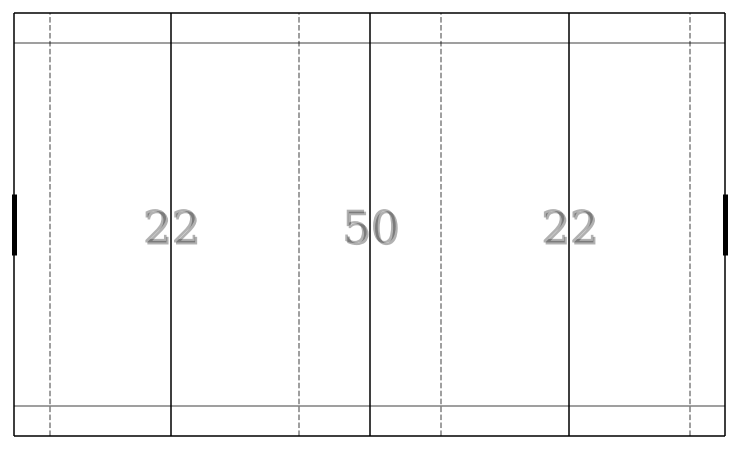

In [72]:
fig=plt.figure() #set up the figures
fig.set_size_inches(13, 8)
ax=fig.add_subplot(1,1,1)
rugby_pitch(ax, linecolor = 'black', poles=True, polescolor = False, labels=True, labelalpha = 0.3, shadows=True) #overlay our different objects on the pitch
plt.ylim(-1, 71)
plt.xlim(-1, 101)
plt.axis('off')
plt.show()

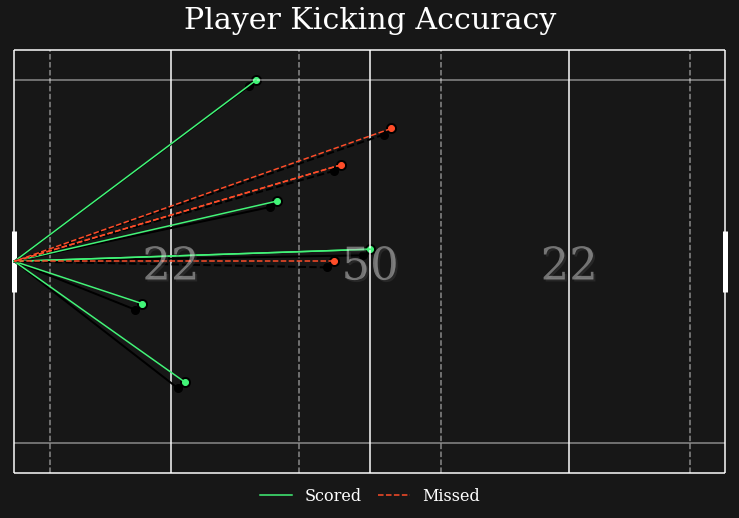

In [90]:
#load the dataframes
sdf = pd.read_csv(r'C:\Users\User\Documents\CSV\RugKickingScored.csv')
mdf = pd.read_csv(r'C:\Users\User\Documents\CSV\RugKickingMissed.csv')

fig=plt.figure() #set up the figures
fig.set_size_inches(13, 8)
ax=fig.add_subplot(1,1,1)

fig.set_facecolor('#171717')

rugby_pitch(ax=ax, linecolor='white', poles=True, polescolor = False, labels=True, labelalpha = 0.4, shadows=True)


#plotting: this includes adding shadows for the lines 
#scored
plt.plot((sdf['x'] - 1, sdf['endx']), (sdf['y'] - 1, sdf['endy']), color='black', linewidth=2) #shadow line
plt.scatter(sdf['x'] - 1, sdf['y'] - 1, color='black', linewidths = 3) #shadow circle
plt.scatter(sdf['x'], sdf['y'], color='black', linewidths = 5) #gives a border around the scatters
plt.scatter(sdf['x'], sdf['y'], color='#42f578') #plots the scatter
plt.plot((sdf['x'], sdf['endx']), (sdf['y'], sdf['endy']), color='#42f578') #draws a line from the scatter to nearest pole
plt.plot((sdf['x'][1], sdf['endx'][1]), (sdf['y'][1], sdf['endy'][1]), color='#42f578', label='Scored') #used for legend
plt.plot((mdf['x'] - 1, mdf['endx']), (mdf['y'] - 1, mdf['endy']), color='black', linewidth=2, linestyle='--') #shadow line
plt.scatter(mdf['x'] - 1, mdf['y'] - 1, color='black', linewidths = 3) #shadow circle
plt.scatter(mdf['x'], mdf['y'], color='black', linewidths = 5) #gives a border around the scatters
plt.scatter(mdf['x'], mdf['y'], color='#ff4d29') #plots the scatter
plt.plot((mdf['x'], mdf['endx']), (mdf['y'], mdf['endy']), color='#ff4d29', linestyle=('--')) #draws a line from the scatter to nearest pole
plt.plot((mdf['x'][1], mdf['endx'][1]), (mdf['y'][1], mdf['endy'][1]), color='#ff4d29', linestyle=('--'), label = 'Missed') #used for legend


#set up font
font = font_manager.FontProperties(family='Serif',
                                   style='normal', size=16)

#legend
ax.legend(loc='lower center', prop=font, ncol=2, borderaxespad = -2, columnspacing = 1, fontsize='x-large', labelcolor='white', facecolor = 'Black', shadow = False, framealpha = 0)
#limit the axis 
plt.ylim(-1, 71)
plt.xlim(-1, 101)

plt.axis('off') #this removes the side axis
plt.title('Player Kicking Accuracy', color='white', size=30, pad=15, fontfamily='serif') #title

figure = plt.gcf() #this will save your current plot 
plt.show()

figure.savefig('rugby.jpg', dpi=2000) # this will download a hd res of your plot 

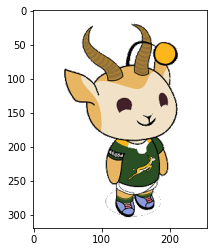

In [7]:
img = mpimg.imread(r'C:\Users\User\Documents\Rocket League Summary\test.png') # insert local path of the image.
imgplot = plt.imshow(img)